## **Music Recommendation System**


In [ ]:
!pip install chart_studio


In [ ]:
!pip install datapane


In [ ]:
!pip install spotipy

## Import Libraries

In [ ]:
import numpy as np                                    #importing the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import datapane as dp
import chart_studio.plotly as py
import chart_studio
import os
from yellowbrick.target import FeatureCorrelation
username = 'vanshkanjani.cs'
api_key = 'dLZizplWD4NRgvrQHzvd'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
plt.rcParams.update({'font.size': 22})

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading the Data

In [64]:
#from google.colab import drive                #connect drive to colab

#drive.mount('/content/gdrive')



In [65]:
spotify_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')            #read the dataset file

In [66]:
spotify_data.head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.088,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


In [67]:
spotify_data.info()                 #display the count and datatype for each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

## Exploratory Data Analysis

In [68]:
spotify_data.describe()              #display some statistics of data

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [69]:
spotify_data.shape              #show the shape i.e, number of rows and columns

(170653, 19)

In [70]:
spotify_data.isna().sum()      #check count of missing values

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [71]:
#The the two records are exactly the same but are not showing up as duplicates because they have uniquie Ids.
spotify_data[spotify_data['name']== "No Regrets - Take 1"]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
2293,0.77,1933,0.93,['Billie Holiday'],0.721,155667,0.186,0,65YsrE85spoEzDa3O8iCPT,0.000145,3,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452
2298,0.77,1933,0.93,['Billie Holiday'],0.721,155667,0.186,0,4FU5KzT1MaIuIV4thAY870,0.000145,3,0.351,-13.833,1,No Regrets - Take 1,17,1933,0.0458,129.452


In [72]:
#spotify_data = spotify_data.drop(['id', 'release_date'], axis=1)           #Dropping the id and release date columns

In [73]:
spotify_data.duplicated().sum()          #count of duplicate after dropping the above columns

0

In [74]:
print(spotify_data.drop_duplicates())

        valence  year  acousticness  \
0        0.0594  1921       0.98200   
1        0.9630  1921       0.73200   
2        0.0394  1921       0.96100   
3        0.1650  1921       0.96700   
4        0.2530  1921       0.95700   
...         ...   ...           ...   
170648   0.6080  2020       0.08460   
170649   0.7340  2020       0.20600   
170650   0.6370  2020       0.10100   
170651   0.1950  2020       0.00998   
170652   0.6420  2020       0.13200   

                                                  artists  danceability  \
0       ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                          ['Dennis Day']         0.819   
2       ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                        ['Frank Parker']         0.275   
4                                          ['Phil Regan']         0.418   
...                                                   ...           ...   
170648

In [75]:
spotify_data = spotify_data[~spotify_data.duplicated()==1]           #removing the dupkicate rows
spotify_data.shape

(170653, 19)

<ipython-input-76-ba0a66caa399>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-76-ba0a66caa399>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-76-ba0a66caa399>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

<Axes: xlabel='mode', ylabel='Density'>

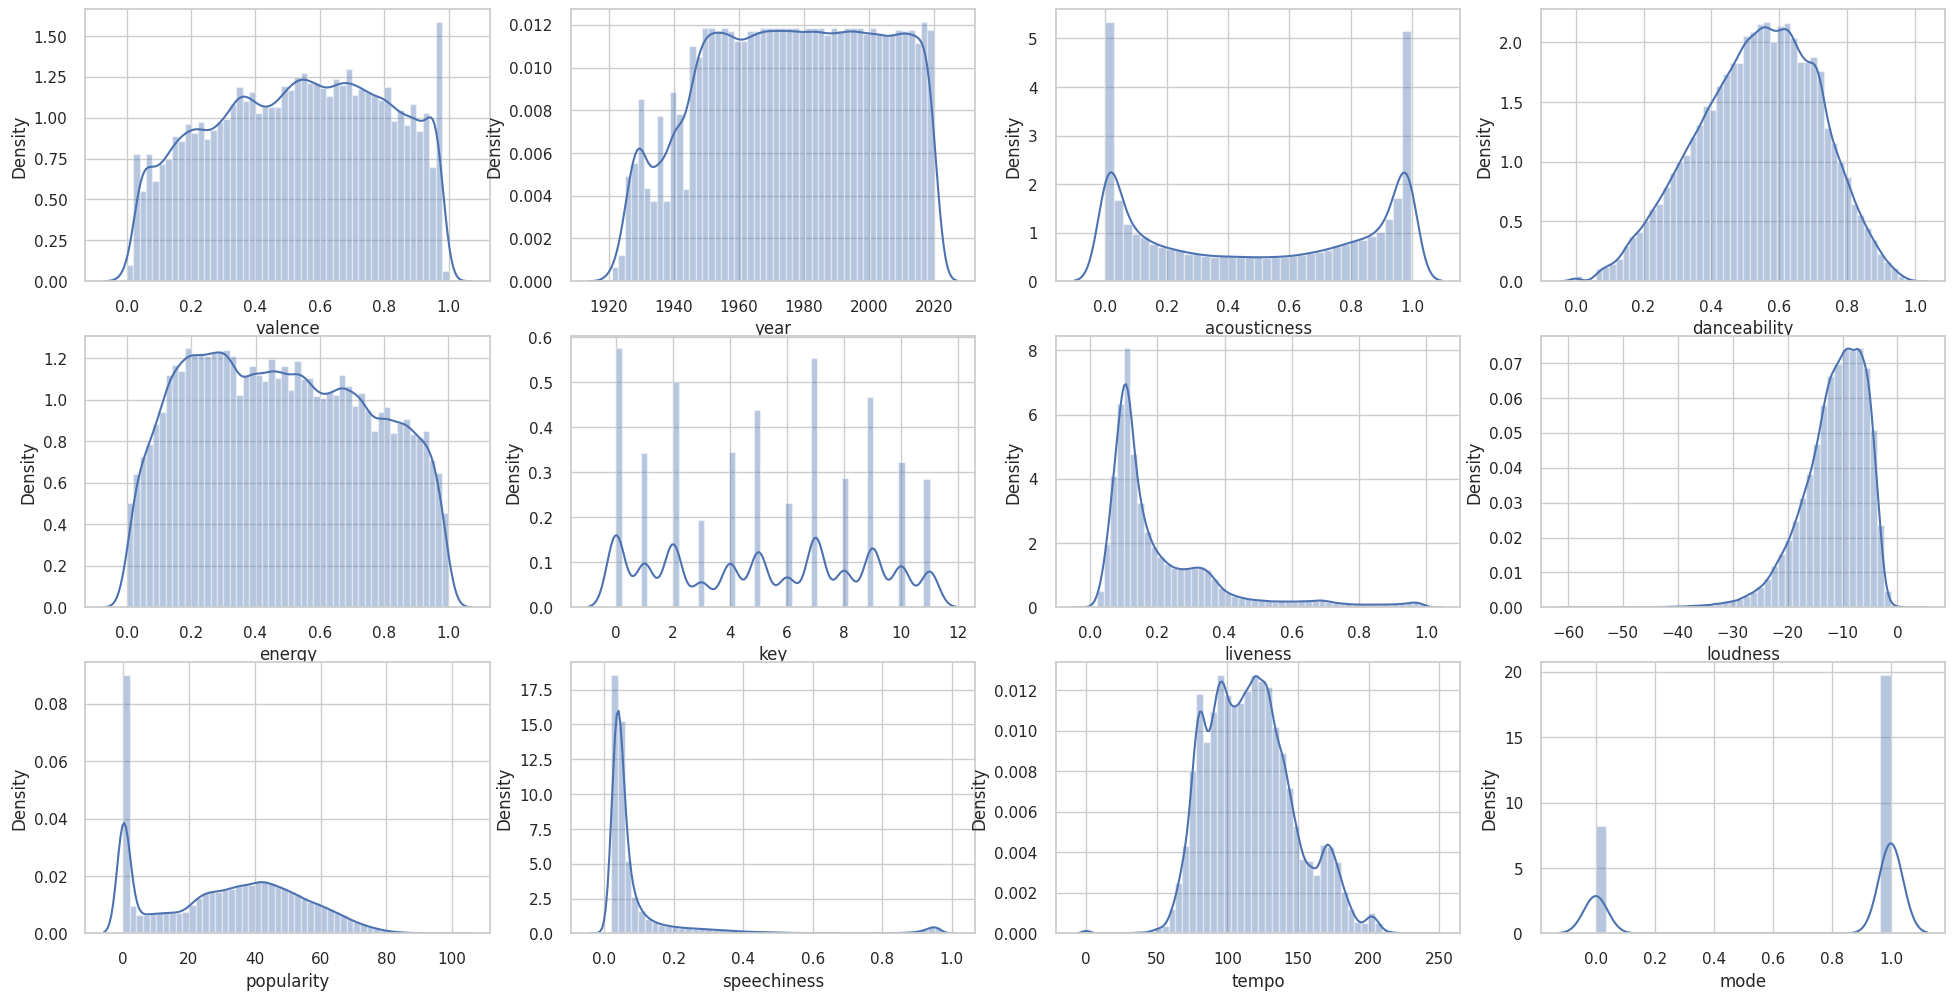

In [76]:
fig,ax = plt.subplots(3,4,figsize=(24,12))                  #Plot histograms for the features to see the distribution

sns.distplot(spotify_data['valence'],ax=ax[0,0])
sns.distplot(spotify_data['year'],ax=ax[0,1])
sns.distplot(spotify_data['acousticness'],ax=ax[0,2])
sns.distplot(spotify_data['danceability'],ax=ax[0,3])
sns.distplot(spotify_data['energy'],ax=ax[1,0])
sns.distplot(spotify_data['key'],ax=ax[1,1])
sns.distplot(spotify_data['liveness'],ax=ax[1,2])
sns.distplot(spotify_data['loudness'],ax=ax[1,3])
sns.distplot(spotify_data['popularity'],ax=ax[2,0])
sns.distplot(spotify_data['speechiness'],ax=ax[2,1])
sns.distplot(spotify_data['tempo'],ax=ax[2,2])
sns.distplot(spotify_data['mode'],ax=ax[2,3])

<ipython-input-77-1a1e2c78693a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

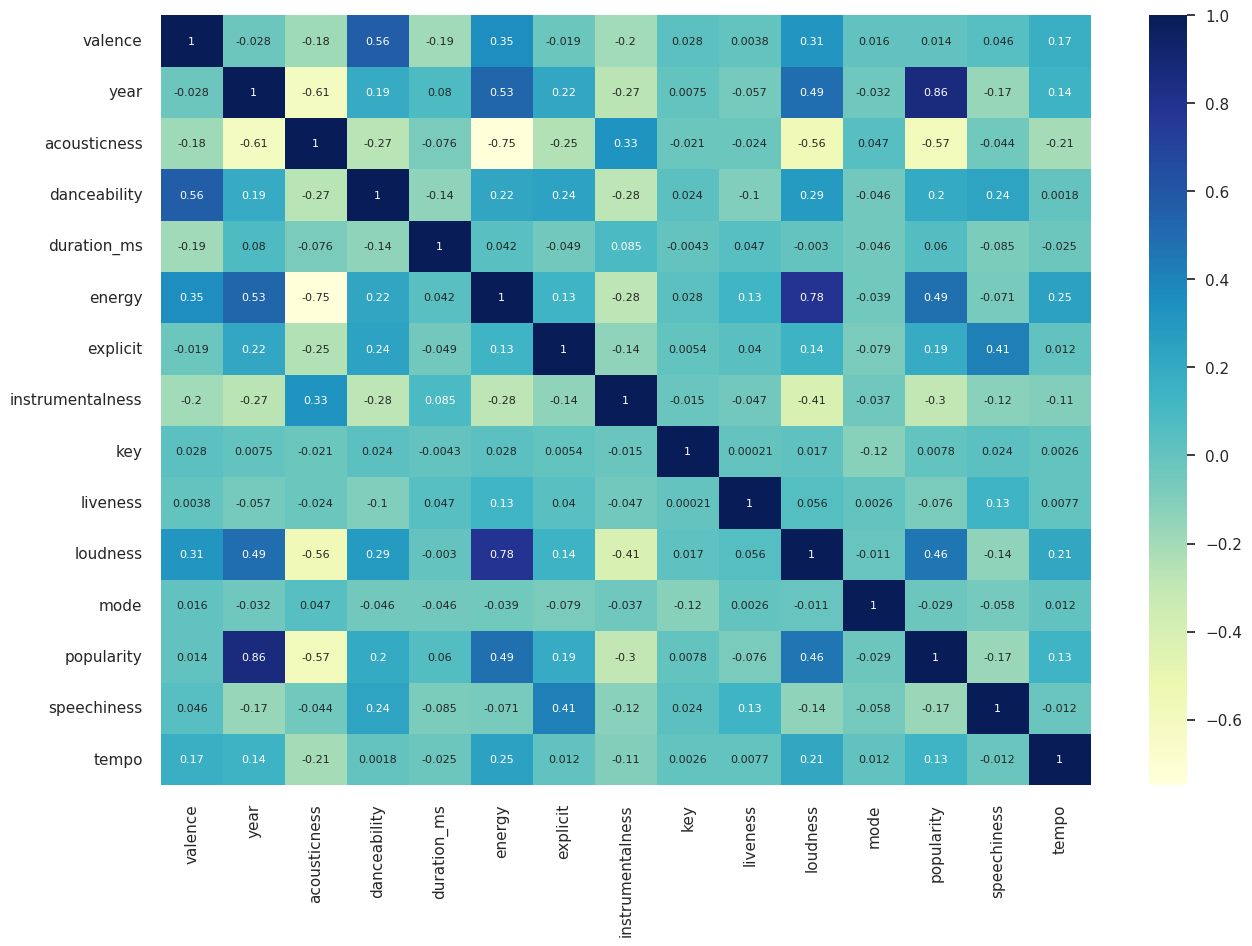

In [77]:
plt.figure(figsize=(15,10))                           #plotting the correlation plot to show correlation between the numeric features
corr = spotify_data.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu",annot_kws={"fontsize":8})

<Axes: xlabel='year', ylabel='popularity'>

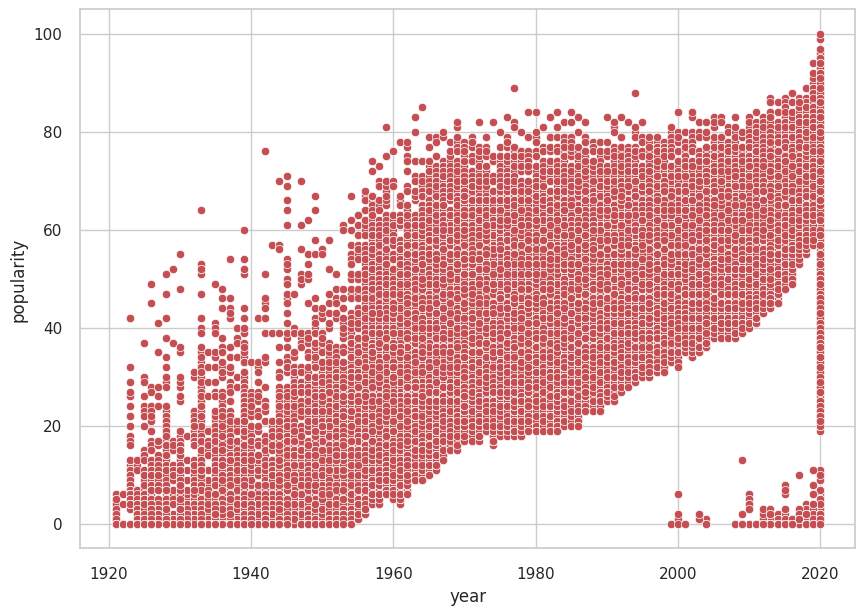

In [78]:
plt.figure(figsize=(10,7))                     #scatter plot of year vs popularity
sns.scatterplot(data=spotify_data, x='year', y="popularity", color="r")

In [ ]:
plt.figure(figsize=(10,7))                         #scatter plot of energy vs loudness
sns.scatterplot(data=spotify_data, x='energy', y="loudness", color="green")

<Axes: xlabel='energy', ylabel='loudness'>

In [ ]:
plt.figure(figsize=(10,7))                      #scatter plot of acousticness vs energy
sns.scatterplot(data=spotify_data[:15000], x='acousticness', y="energy")

In [ ]:
feature_list = ['acousticness', 'danceability', 'energy', 'instrumentalness','liveness', 'loudness', 'speechiness', 'tempo', 'valence','explicit','key','mode','year']

X, y = spotify_data[feature_list], spotify_data['popularity']

features = np.array(feature_list)
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(12,12)
visualizer.fit(X, y)
visualizer.show()                                       #feature correlation with popularity

In [ ]:
popular_songs = spotify_data.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15)      #Find the Top 15 popular songs
popular_songs


In [ ]:
fig, axis = plt.subplots(figsize=(12, 6))

# Use popular_songs.index as the x-axis data and popular_songs as the y-axis data
sns.barplot(x=popular_songs.index, y=popular_songs, color='darkorange')

axis.set_title('Top 15 Popular Tracks')
axis.set_xlabel('Songs')
axis.set_ylabel('Popularity')
axis.grid(False)
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [ ]:
popular_artists = spotify_data.groupby("artists")['popularity'].sum().sort_values(ascending=False).head(15)      #Find the Top 15 popular artists
popular_artists

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming popular_artists is a DataFrame or Series with the artist names as index and popularity scores as values

fig, axis = plt.subplots(figsize=(12, 6))

# Use popular_artists.index as the x-axis data and popular_artists.values as the y-axis data
sns.barplot(x=popular_artists.index, y=popular_artists.values, color='gold')

axis.set_title('Top 15 Popular Artists')
axis.set_xlabel('Artists')
axis.set_ylabel('Popularity')
axis.grid(False)
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [ ]:
artist = pd.DataFrame(spotify_data['artists'].value_counts().head()).reset_index()            #Show artists with the highest song count
artist.columns=['Artists','Songs_Count']
artist

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ["acousticness", "danceability", "energy", "speechiness", "liveness", "valence"]

plt.figure(figsize=(12, 6))
plt.title('Audio Characteristics over the Years')
plt.xlabel('Year')
plt.ylabel('Characteristics')
sns.set_style("whitegrid", {'axes.grid': False})

for col in columns:
    val = spotify_data.groupby('year')[col].mean()
    sns.lineplot(x=val.index, y=val, label=col)

plt.legend(loc='upper right')  # Add a legend to label the lines
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo', 'valence']

# Define the number of rows and columns for the subplots
n_rows = 4
n_cols = 4

# Create subplots with the specified layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))
fig.suptitle('Audio Feature Trends Over Time', fontsize=16)

# Flatten the axes to iterate over them
axes = axes.flatten()

for i, col in enumerate(columns):
    y = spotify_data.groupby('year')[col].mean()
    x = y.index

    # Plot the line plot on the current axis
    sns.lineplot(x=x, y=y, label=col, color="indigo", ax=axes[i])

    # Set axis labels and title
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(col.capitalize())
    axes[i].set_title(f'{col.capitalize()} Over Time')

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Display the legend for each subplot
    axes[i].legend(loc='upper right')

# Hide empty subplots if there are fewer than 16 features
for i in range(len(columns), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust the layout to avoid overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plots
plt.show()


In [ ]:
year = pd.DataFrame(spotify_data['year'].value_counts())  #find the year counts
year = year.sort_index()

In [ ]:
ax=year.plot(kind='line',figsize=(10,5) ,color='deeppink')  #Plot line plot to show count of songs released every year
plt.title("Number of Songs released")
plt.xlabel('Years')
plt.ylabel('Count')

In [ ]:
def get_decade(year):

    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)

    return decade

spotify_data['decade'] = spotify_data['year'].apply(get_decade)    #Add a decade column and group the years into 10 year periods

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size directly in the countplot function
sns.set(style="whitegrid")
plt.figure(figsize=(11, 6))

# Assuming 'decade' is a column in your 'spotify_data' DataFrame
sns.countplot(data=spotify_data, x='decade')

# Labeling the plot
plt.title('Number of Songs Released in Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Songs')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
key_popularity = pd.DataFrame(spotify_data.groupby('key')['popularity'].mean()).reset_index()
key_popularity.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#',
                        7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
key_popularity.head(5)
                                   #Map the numerical key values to key strings and find mean popularity of each key

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.bar( key_popularity['key'], key_popularity['popularity'], color="orchid", width =0.60)   #plot bar chart to show popularity score for each key
plt.title('Key VS Popularity')
plt.xlabel('Key')
plt.ylabel('Popularity')

In [ ]:
mode_popularity = spotify_data.groupby('mode')['popularity'].mean()       #Group by mode and find mean popularity for each group
mode_popularity.head(5)

In [ ]:
ax=mode_popularity.plot(kind='bar',figsize=(5,5) ,color='forestgreen', width = 0.40)    #plot barchart to show mode and its popularity
plt.title('Mode VS Popularity')
plt.xlabel('Mode')
plt.ylabel('Popularity')

In [ ]:
temp = spotify_data.copy()    #create a copy of the dataframe

In [ ]:
keys = {0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}
temp.replace({'key' : { 0 : 'C', 1 : 'C#', 2 : 'D', 3 : 'D#', 4 : 'E', 5 : 'F', 6 : 'F#', 7 : 'G', 8 : 'G#', 9 : 'A', 10 : 'A#', 11 : 'B'}} , inplace=True)
temp.head(3)
                   #map the key values to the key strings and replace them inplace

In [ ]:
modes = {0:'Minor',1:'Major'}
temp.replace({'mode' : {0:'Minor',1:'Major'}} , inplace=True)
temp.head(3)                         #map the numeric mode values to major and minor and replace them inplace

In [ ]:
temp['key_mode'] = temp['key'] + " " + temp['mode']
temp['key_mode'].head(5)                              #create a new column key_mode and concatenate the key and mode columns

In [ ]:
key_mode_pop = pd.DataFrame(temp.groupby('key_mode')['popularity'].mean()).reset_index()   #find the mean popularity for each group in key_mode
key_mode_pop.head(5)

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
plt.bar( key_mode_pop['key_mode'], key_mode_pop['popularity'], color="crimson", width =0.60)
plt.title('key/Mode VS Popularity')
plt.xlabel('key/Mode')
plt.ylabel('Popularity')                 #plot the barchart to show popularity for each key_mode group


In [ ]:
boxPlot = plt.subplots(figsize = (20,8))
boxPlot=sns.boxplot(data=spotify_data)             #plot a boxplot for the data

In [ ]:
numeric_data = spotify_data.drop(['artists','name','decade','year','id','release_date'], axis=1)    #drop the categorical columns that are not required
numeric_data.head(3)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()                    #Standard scaling the data columns
features = numeric_data.columns
scaled_minmax= scaler.fit_transform(numeric_data)
scaled_data = pd.DataFrame(scaled_minmax, columns=features)
scaled_data.head()

In [ ]:
scaled_data.describe()   #display statistics of scaled data

In [ ]:
box_scaled = plt.subplots(figsize = (20,8))
box_scaled=sns.boxplot(data=scaled_data)            #plot box plot for the scaled data features

In [ ]:
spotify_data.shape    #display the number of rows and columns

## Clustering Songs

In [ ]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()),                  #performing K-means clustering with number of clusters as 5
                                  ('kmeans', KMeans(n_clusters=5,
                                   verbose=2))], verbose=True)
X = spotify_data.select_dtypes(np.number)
number_cols = list(X.columns)
kmeans = song_cluster_pipeline.fit(X)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
Initialization complete
Iteration 0, inertia 2449993.4911621194.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Iteration 1, inertia 1847665.2764525241.
Iteration 2, inertia 1811041.9568329835.
Iteration 3, inertia 1761402.5670844256.
Iteration 4, inertia 1724510.1571381558.
Iteration 5, inertia 1701620.4903994158.
Iteration 6, inertia 1671044.8547025672.
Iteration 7, inertia 1659784.1787077754.
Iteration 8, inertia 1658734.673849566.
Iteration 9, inertia 1658334.8216789132.
Iteration 10, inertia 1657912.2443217123.
Iteration 11, inertia 1657376.242830827.
Iteration 12, inertia 1656523.9991349983.
Iteration 13, inertia 1655074.93834423.
Iteration 14, inertia 1652374.1195597285.
Iteration 15, inertia 1647351.014267088.
Iteration 16, inertia 1637819.0126787229.
Iteration 17, inertia 1615409.590977262.
Iteration 18, inertia 1601018.594211985.
Iteration 19, inertia 1600899.8691169994.
Iteration 20, inertia 1600884.6251425156.
Converged at iteration 20: center shift 3.7122597984011715e-05 within tolerance 0.00010000000000000789.
Initialization complete
Iteration 0, inertia 2279812.726456949.
Iteratio

In [ ]:
song_cluster_labels = song_cluster_pipeline.predict(X)

In [ ]:
spotify_data['cluster_label'] = song_cluster_labels

In [ ]:
spotify_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade,cluster_label
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920s,2
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1920s,3
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1920s,2
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1920s,2
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1920s,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,...,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,2020s,0
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,...,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,2020s,0
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,...,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,2020s,0
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,...,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,2020s,4


In [ ]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])          #perform PCA to reduce dimensions for cluster plot
song_embedding = pca_pipeline.fit_transform(X)

projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = spotify_data['name']
projection['cluster'] = spotify_data['cluster_label']

In [ ]:
import plotly.express as px                           #plotting the clusters
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()




## Building a Content-Based Recommender System

In [ ]:
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='70dbb7803e6540d39b7a541d81a661f4',
                                                           client_secret='50ab78c49f5f44cabba3436c9ede69ce'))


def find_song(name, year):

    song_data = defaultdict()
    results = sp.search(q= 'track: {} year: {}'.format(name,
                                                       year), limit=1)
    if results['tracks']['items'] == []:
        return None

    results = results['tracks']['items'][0]

    track_id = results['id']
    audio_features = sp.audio_features(track_id)[0]

    song_data['name'] = [name]
    song_data['year'] = [year]
    song_data['explicit'] = [int(results['explicit'])]
    song_data['duration_ms'] = [results['duration_ms']]
    song_data['popularity'] = [results['popularity']]

    for key, value in audio_features.items():
        song_data[key] = value

    return pd.DataFrame(song_data)


In [ ]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

def get_song_data(song, spotify_data):

    try:
        song_data = spotify_data[(spotify_data['name'] == song['name'])
                                & (spotify_data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year'])


def get_mean_vector(song_list, spotify_data):

    song_vectors = []

    for song in song_list:
        song_data = get_song_data(song, spotify_data)
        if song_data is None:
            print('Warning: {} does not exist in Spotify or in database'.format(song['name']))
            continue
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)

    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict


def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_cols = ['name', 'year', 'artists', 'cluster_label','valence','acousticness',	'danceability',	'energy',	'instrumentalness',	'liveness',	'loudness','speechiness',	'tempo']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(spotify_data[number_cols])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_cols].to_dict(orient='records')


In [ ]:
recommend_songs([{'name': 'Levitating', 'year':2020}],  spotify_data)     #recommend songs similar to input song

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



[{'name': 'Humanos a Marte',
  'year': 2014,
  'artists': "['Chayanne']",
  'cluster_label': 0,
  'valence': 0.7859999999999999,
  'acousticness': 0.112,
  'danceability': 0.69,
  'energy': 0.902,
  'instrumentalness': 0.0,
  'liveness': 0.175,
  'loudness': -4.269,
  'speechiness': 0.0407,
  'tempo': 92.988},
 {'name': 'Lush Life',
  'year': 2017,
  'artists': "['Zara Larsson']",
  'cluster_label': 0,
  'valence': 0.799,
  'acousticness': 0.133,
  'danceability': 0.6940000000000001,
  'energy': 0.7120000000000001,
  'instrumentalness': 0.0,
  'liveness': 0.211,
  'loudness': -3.923,
  'speechiness': 0.046,
  'tempo': 98.022},
 {'name': 'DUELE EL CORAZON (feat. Wisin)',
  'year': 2016,
  'artists': "['Enrique Iglesias', 'Wisin']",
  'cluster_label': 0,
  'valence': 0.846,
  'acousticness': 0.0786,
  'danceability': 0.7240000000000001,
  'energy': 0.904,
  'instrumentalness': 0.0,
  'liveness': 0.226,
  'loudness': -3.354,
  'speechiness': 0.0966,
  'tempo': 90.999},
 {'name': 'Mayores'

In [ ]:
recommend_songs([{'name':'Beat It', 'year': 1982},
                 {'name': 'Billie Jean', 'year': 1988},                       #recommend songs similar to multiple input songs
                 {'name': 'Thriller', 'year': 1982}], spotify_data)

<ipython-input-116-e25ea5616152>:32: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



[{'name': 'Hot Legs',
  'year': 1977,
  'artists': "['Rod Stewart']",
  'cluster_label': 0,
  'valence': 0.97,
  'acousticness': 0.0368,
  'danceability': 0.7070000000000001,
  'energy': 0.906,
  'instrumentalness': 0.000968,
  'liveness': 0.6609999999999999,
  'loudness': -5.771,
  'speechiness': 0.0309,
  'tempo': 112.837},
 {'name': 'Thriller - 2003 Edit',
  'year': 2003,
  'artists': "['Michael Jackson']",
  'cluster_label': 0,
  'valence': 0.836,
  'acousticness': 0.0892,
  'danceability': 0.775,
  'energy': 0.852,
  'instrumentalness': 2.35e-05,
  'liveness': 0.823,
  'loudness': -4.813,
  'speechiness': 0.0528,
  'tempo': 118.561},
 {'name': "I Didn't Mean To Turn You On",
  'year': 1984,
  'artists': "['Cherrelle']",
  'cluster_label': 0,
  'valence': 0.746,
  'acousticness': 0.0629,
  'danceability': 0.7709999999999999,
  'energy': 0.8240000000000001,
  'instrumentalness': 0.0318,
  'liveness': 0.787,
  'loudness': -10.088,
  'speechiness': 0.057,
  'tempo': 120.247},
 {'name'

In [ ]:
recommend_songs([{'name': 'One Right Now', 'year': 2021}], spotify_data)          #recommend songs similar to input song and display its attribute values

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



[{'name': 'La Santa',
  'year': 2020,
  'artists': "['Bad Bunny', 'Daddy Yankee']",
  'cluster_label': 4,
  'valence': 0.586,
  'acousticness': 0.0326,
  'danceability': 0.7440000000000001,
  'energy': 0.868,
  'instrumentalness': 0.0,
  'liveness': 0.0822,
  'loudness': -4.524,
  'speechiness': 0.047,
  'tempo': 93.037},
 {'name': 'queen of broken hearts',
  'year': 2020,
  'artists': "['blackbear']",
  'cluster_label': 4,
  'valence': 0.825,
  'acousticness': 0.00663,
  'danceability': 0.7170000000000001,
  'energy': 0.7120000000000001,
  'instrumentalness': 0.0,
  'liveness': 0.0756,
  'loudness': -6.098,
  'speechiness': 0.0765,
  'tempo': 97.019},
 {'name': 'Wish You Were Sober',
  'year': 2020,
  'artists': "['Conan Gray']",
  'cluster_label': 4,
  'valence': 0.696,
  'acousticness': 0.0178,
  'danceability': 0.701,
  'energy': 0.728,
  'instrumentalness': 0.0,
  'liveness': 0.17,
  'loudness': -5.226,
  'speechiness': 0.0468,
  'tempo': 91.071},
 {'name': 'anxiety (with FRND)',
